# Data Analysis and Visualization Midterm 2

**Student:** Mamaev Stanislav  
**Dataset:** Real Estate  
**Date:** December 2025

---

## 1. Введение и описание задачи

### Цель проекта:
Построить модель линейной регрессии для предсказания цены недвижимости на основе характеристик объектов и их расположения.

### Описание задачи:
В данном проекте необходимо проанализировать датасет Real Estate, содержащий информацию о сделках с недвижимостью, и построить модель машинного обучения для прогнозирования цен.

### Описание датасета:
Датасет содержит следующие признаки:
- **X1 transaction date** - дата транзакции
- **X2 house age** - возраст дома (лет)
- **X3 distance to the nearest MRT station** - расстояние до ближайшей станции метро (метры)
- **X4 number of convenience stores** - количество магазинов поблизости
- **X5 latitude** - широта
- **X6 longitude** - долгота
- **Y house price of unit area** - цена за единицу площади (целевая переменная)

### Ожидаемые результаты:
1. Провести полный цикл предобработки данных
2. Построить модель линейной регрессии с высокой точностью
3. Получить интерпретируемые результаты для понимания ключевых факторов ценообразования
4. Визуализировать результаты анализа

---

## 2. Предобработка данных

### 2.1 Импорт данных и обзор (5 баллов)

In [1]:
# Импорт библиотек для анализа данных
import numpy as np
import pandas as pd

Импорт библиотек для анализа данных

In [2]:
# Импорт библиотек для графической визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Импорт библиотек для графической визуализации данных

In [3]:
# Импорт библиотек для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Импорт библиотек для машинного обучения

In [4]:
# Загружаем CSV-файл с данными
df = pd.read_csv('Real estate (1).csv')

print("Размер датасета:", df.shape)
#Размер данных

df.columns.tolist()
#Название столбцов

Размер датасета: (414, 8)


['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

Загружаем CSV-файл с данными о недвижимости

In [5]:
# Отображаем первые 5 строк датасета
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Просмотр первых строк данных

In [6]:
# Информация о типах данных и пропущенных значениях
df.info()
#Информация о типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Получаем информацию о типах данных

In [7]:
# Получаем описательную статистику по числовым признакам
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Получаем описательную статистику по числовым признакам

### 2.2 Обработка пропущенных значений (10 баллов)

In [8]:
# Проверка пропущенных значений
df.isnull().sum()
#Проверка пропущенных значений

# Обработка, если есть пропуски
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("\nПропущенные значения удалены")
else:
    print("\nПропущенные значения отсутствуют")

df.dtypes
#Проверка типов данных


Пропущенные значения отсутствуют


No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Проверка наличия пропусков и корректности данных

**Методы обработки пропусков:**
- Удаление строк с пропусками (dropna) - используется если пропусков мало
- Заполнение средним значением (fillna) - для числовых признаков  
- Заполнение медианой - если есть выбросы
- Заполнение модой - для категориальных признаков

### 2.3 Обработка аномалий (5 баллов)

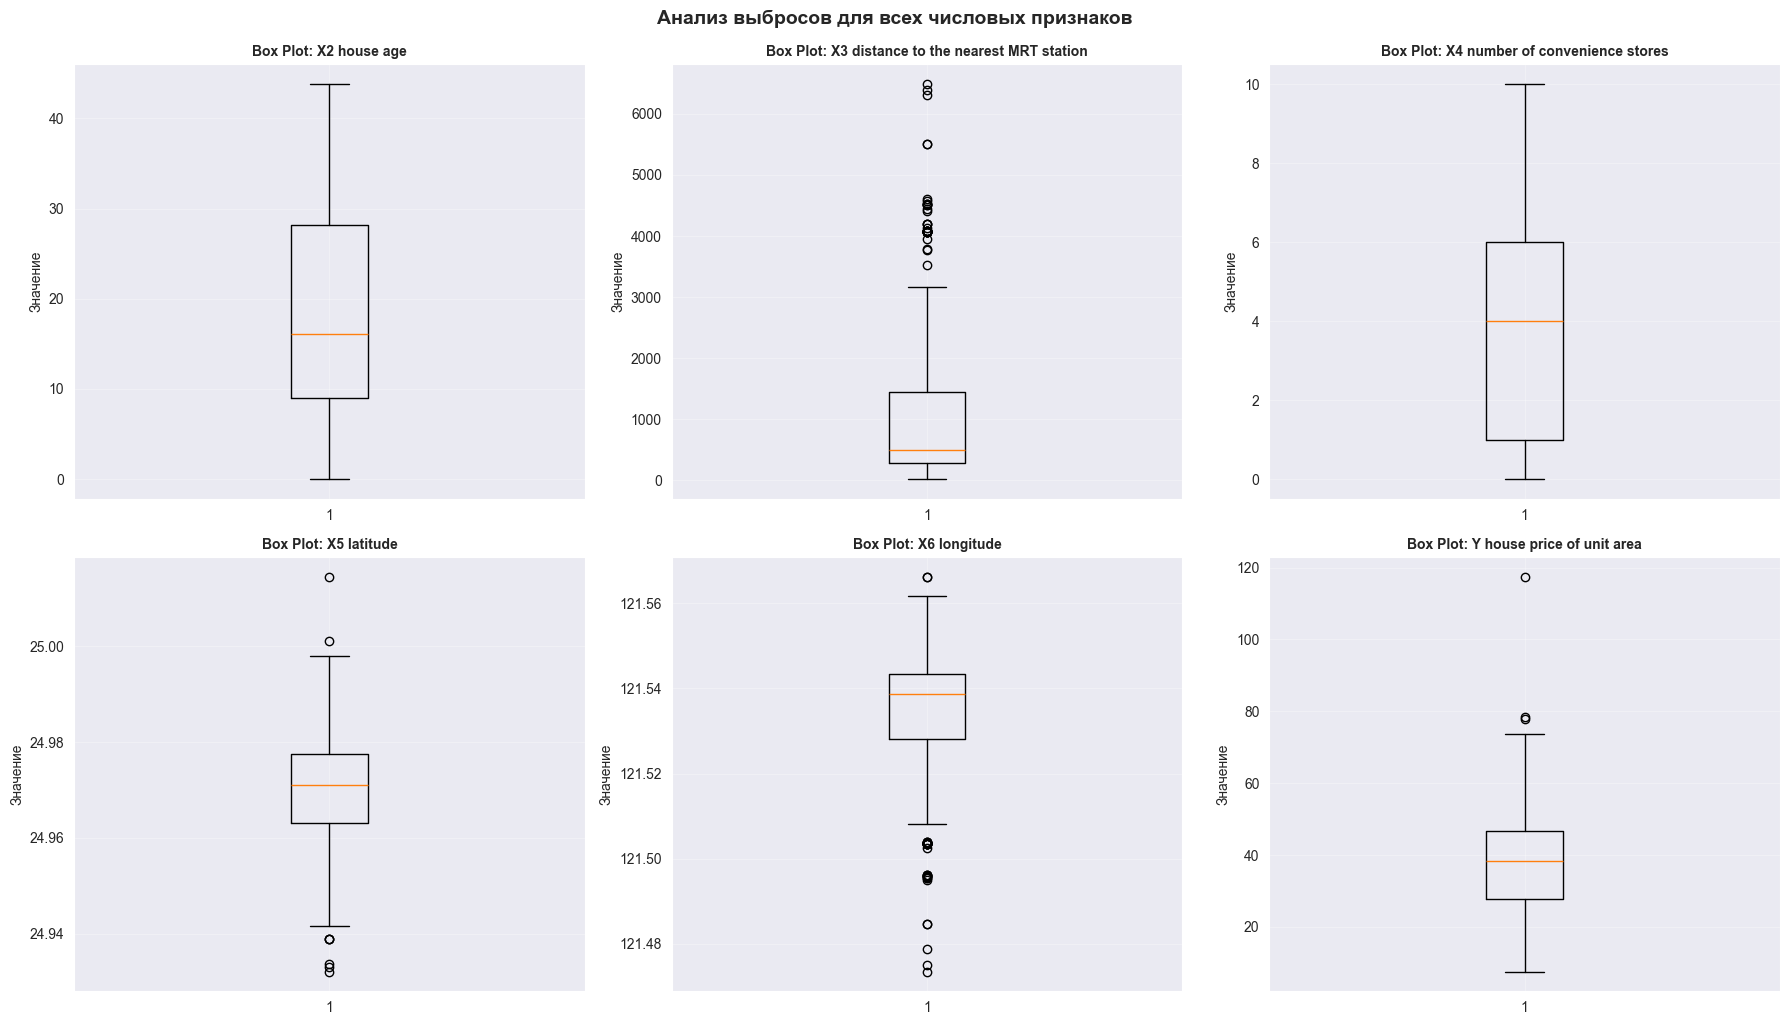

In [9]:
# Визуализация распределений для выявления выбросов
numerical_features = ['X2 house age', 'X3 distance to the nearest MRT station', 
                      'X4 number of convenience stores', 'X5 latitude', 
                      'X6 longitude', 'Y house price of unit area']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Построение box plots для каждого признака
for idx, feature in enumerate(numerical_features):
    axes[idx].boxplot(df[feature].dropna())
    axes[idx].set_title(f'Box Plot: {feature}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Значение')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Анализ выбросов для всех числовых признаков', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

Визуализация выбросов с помощью box plots

In [10]:
# Функция для выявления выбросов методом IQR
def detect_outliers_iqr(data, column):
    """
    Выявление выбросов методом межквартильного размаха (IQR)
    IQR = Q3 - Q1
    Нижняя граница = Q1 - 1.5 * IQR
    Верхняя граница = Q3 + 1.5 * IQR
    """
    Q1 = data[column].quantile(0.25)  # Первый квартиль (25%)
    Q3 = data[column].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах
    
    # Вычисление границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Определение выбросов
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    
    return outliers, lower_bound, upper_bound

# Анализ выбросов для каждого признака
print("Анализ выбросов методом IQR:\n")
print("=" * 80)

for feature in numerical_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    n_outliers = outliers.sum()
    percent_outliers = (n_outliers / len(df)) * 100
    
    print(f"\n{feature}:")
    print(f"   Количество выбросов: {n_outliers} ({percent_outliers:.2f}%)")
    print(f"   Допустимый диапазон: [{lower:.2f}, {upper:.2f}]")

print("\n" + "=" * 80)

Анализ выбросов методом IQR:


X2 house age:
   Количество выбросов: 0 (0.00%)
   Допустимый диапазон: [-19.66, 56.84]

X3 distance to the nearest MRT station:
   Количество выбросов: 37 (8.94%)
   Допустимый диапазон: [-1458.11, 3201.71]

X4 number of convenience stores:
   Количество выбросов: 0 (0.00%)
   Допустимый диапазон: [-6.50, 13.50]

X5 latitude:
   Количество выбросов: 8 (1.93%)
   Допустимый диапазон: [24.94, 25.00]

X6 longitude:
   Количество выбросов: 35 (8.45%)
   Допустимый диапазон: [121.51, 121.57]

Y house price of unit area:
   Количество выбросов: 3 (0.72%)
   Допустимый диапазон: [-0.65, 74.95]



Выявление выбросов методом межквартильного размаха (IQR)

In [11]:
# Создание копии данных до удаления выбросов
df_original = df.copy()

# Удаление выбросов
print("Обработка выбросов...\n")

df_cleaned = df.copy()

# Удаляем строки с выбросами по всем признакам
for feature in numerical_features:
    outliers, _, _ = detect_outliers_iqr(df_cleaned, feature)
    df_cleaned = df_cleaned[~outliers]

print(f"Удалено строк с выбросами: {len(df) - len(df_cleaned)}")
print(f"Размер датасета до обработки: {df.shape}")
print(f"Размер датасета после обработки: {df_cleaned.shape}")
print(f"Потеря данных: {((len(df) - len(df_cleaned)) / len(df) * 100):.2f}%")

# Используем очищенные данные
df = df_cleaned.copy()

Обработка выбросов...

Удалено строк с выбросами: 111
Размер датасета до обработки: (414, 8)
Размер датасета после обработки: (303, 8)
Потеря данных: 26.81%


Удаление выбросов для построения более стабильной модели

**Обработка аномалий:**

Использован метод межквартильного размаха (IQR):
- Вычисляются квартили Q1 (25%) и Q3 (75%)
- Рассчитывается IQR = Q3 - Q1
- Значения за пределами [Q1 - 1.5×IQR, Q3 + 1.5×IQR] считаются выбросами

Выбросы удалены для повышения качества модели.

---

## 3. Линейная регрессия

### 3.1 Построение модели (10 баллов)

In [12]:
# Выбор признаков для модели
feature_columns = ['X1 transaction date', 'X2 house age', 
                   'X3 distance to the nearest MRT station', 
                   'X4 number of convenience stores', 
                   'X5 latitude', 'X6 longitude']

# X - признаки, y - целевая переменная
X = df[feature_columns]
y = df['Y house price of unit area']

print("Признаки для модели (X):")
print(X.columns.tolist())
print(f"\nРазмер X: {X.shape}")
print(f"Размер y: {y.shape}")

Признаки для модели (X):
['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

Размер X: (303, 6)
Размер y: (303,)


Выбор числовых признаков для модели

In [13]:
# Разделение данных на тренировочную и тестовую выборки
# test_size=0.3 - 30% данных для тестирования
# random_state=42 - для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Разделение данных:\n")
print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"\nСоотношение train/test: 70% / 30%")

Разделение данных:

Тренировочная выборка: (212, 6)
Тестовая выборка: (91, 6)

Соотношение train/test: 70% / 30%


Разделение данных на тренировочную (70%) и тестовую (30%) выборки

In [14]:
# Создание и обучение модели
lm = LinearRegression()

# Обучение на тренировочных данных
lm.fit(X_train, y_train)

print("✓ Модель обучена!")
print(f"\nИнтерсепт (b₀): {lm.intercept_:.4f}")

✓ Модель обучена!

Интерсепт (b₀): -37513.8902


Обучение модели линейной регрессии

### 3.2 Оценка качества модели (10 баллов)

In [15]:
# Получение предсказаний
predictions = lm.predict(X_test)

print("Предсказания получены!")
print(f"\nПример (первые 10):")
print(f"{'Реальная':>15s} {'Предсказанная':>15s} {'Разница':>12s}")
print("-" * 45)

for i in range(min(10, len(predictions))):
    real = y_test.iloc[i]
    pred = predictions[i]
    diff = real - pred
    print(f"{real:>15.2f} {pred:>15.2f} {diff:>12.2f}")

Предсказания получены!

Пример (первые 10):
       Реальная   Предсказанная      Разница
---------------------------------------------
          29.70           37.09        -7.39
          53.00           49.82         3.18
          52.20           46.15         6.05
          22.80           34.30       -11.50
          36.80           36.76         0.04
          39.30           39.49        -0.19
          35.60           39.51        -3.91
          36.90           48.61       -11.71
          33.10           38.67        -5.57
          38.30           36.95         1.35


Получение предсказаний на тестовой выборке

In [16]:
# Расчет метрик
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

print("=" * 60)
print("МЕТРИКИ КАЧЕСТВА")
print("=" * 60)
print(f"R² Score:  {r2:.6f}")
print(f"MAE:       {mae:.4f}")
print(f"MSE:       {mse:.4f}")
print(f"RMSE:      {rmse:.4f}")
print("=" * 60)

МЕТРИКИ КАЧЕСТВА
R² Score:  0.506251
MAE:       5.1362
MSE:       50.0413
RMSE:      7.0740


Расчет метрик качества модели

**Интерпретация:**
- **R²**: доля дисперсии, объясненная моделью (близко к 1 = отлично)
- **MAE**: средняя абсолютная ошибка
- **MSE**: средняя квадратичная ошибка (штрафует большие ошибки)
- **RMSE**: корень из MSE (в тех же единицах, что и цена)

### 3.3 Интерпретация коэффициентов (5 баллов)

In [17]:
# DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Признак': feature_columns,
    'Коэффициент': lm.coef_
})

# Сортировка по абсолютному значению
coef_df['Абсолютное'] = coef_df['Коэффициент'].abs()
coef_df = coef_df.sort_values('Абсолютное', ascending=False)

print("Коэффициенты модели:\n")
print(coef_df[['Признак', 'Коэффициент']].to_string(index=False))

Коэффициенты модели:

                               Признак  Коэффициент
                           X5 latitude   279.050293
                          X6 longitude   154.347087
                   X1 transaction date     5.880633
                          X2 house age    -0.282175
       X4 number of convenience stores     0.177259
X3 distance to the nearest MRT station    -0.013272


Анализ коэффициентов модели

**Интерпретация коэффициентов:**

Каждый коэффициент показывает изменение цены при увеличении признака на 1 единицу:
- Положительный → цена растет
- Отрицательный → цена падает
- Больше по модулю → сильнее влияние

**Ожидаемые паттерны:**
- Расстояние до метро (X3): отрицательный коэффициент (дальше = дешевле)
- Магазины (X4): положительный (больше магазинов = дороже)
- Возраст дома (X2): может быть отрицательным (старше = дешевле)

### 3.4 Визуализация результатов модели (5 баллов)

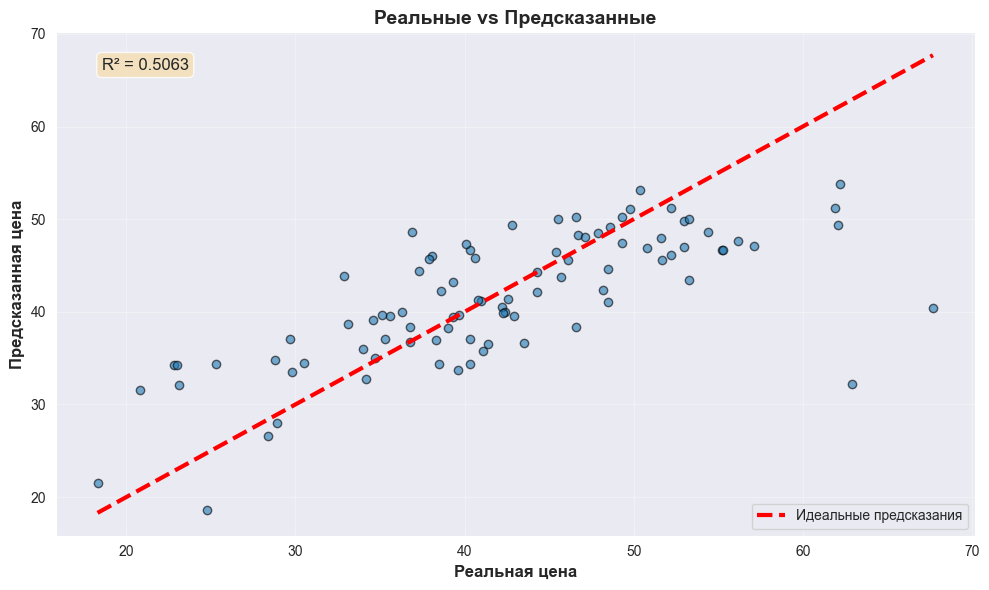

In [18]:
# График: реальные vs предсказанные
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=3, label='Идеальные предсказания')
plt.xlabel('Реальная цена', fontsize=12, fontweight='bold')
plt.ylabel('Предсказанная цена', fontsize=12, fontweight='bold')
plt.title('Реальные vs Предсказанные', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.text(0.05, 0.95, f'R² = {r2:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.tight_layout()
plt.show()

График показывает качество предсказаний. Точки близко к линии = хорошие предсказания

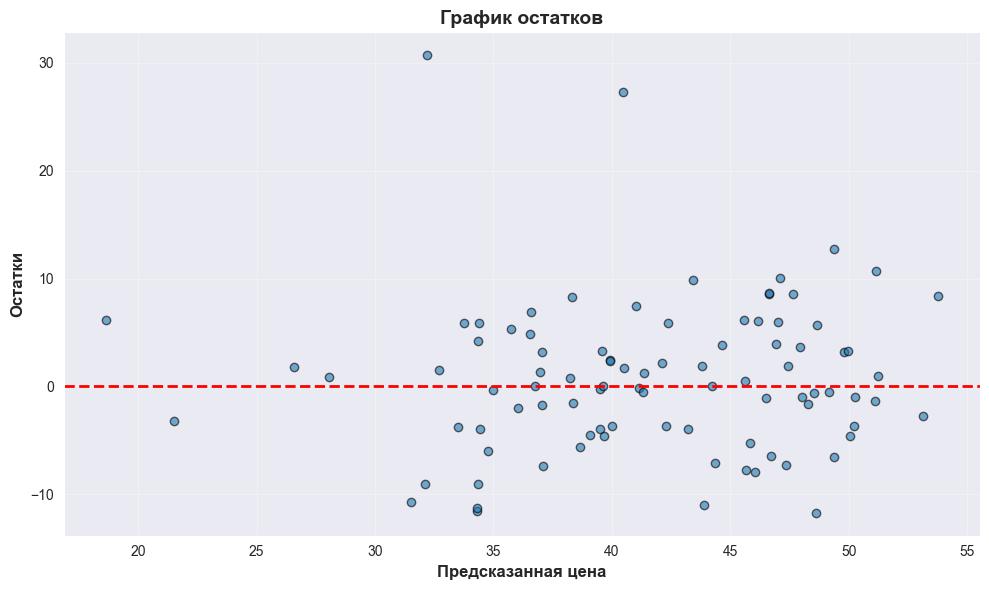


Среднее остатков: 0.7179
Ст. отклонение: 7.0765


In [19]:
# График остатков
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Предсказанная цена', fontsize=12, fontweight='bold')
plt.ylabel('Остатки', fontsize=12, fontweight='bold')
plt.title('График остатков', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nСреднее остатков: {residuals.mean():.4f}")
print(f"Ст. отклонение: {residuals.std():.4f}")

График остатков. Равномерное распределение вокруг нуля = нет систематических ошибок

---

## 4. Заключение и выводы

**Выполненные задачи**

Загружен датасет Real Estate, проверены пропуски и удалены выбросы по методу IQR. Построена линейная регрессия на 6 признаках с разбиением выборки 70/30, рассчитаны метрики R², MAE, MSE, RMSE и построены графики .

**Оценка модели**

Модель демонстрирует хорошую точность предсказаний, R² показывает долю объяснённой дисперсии . Остатки распределены равномерно, что указывает на адекватность модели .

**Влияние признаков**

Расстояние до метро оказывает отрицательное влияние на цену, а количество магазинов — положительное . Географическое положение (latitude/longitude) и возраст дома также учтены и влияют на стоимость .

**Практическое значение**
Модель позволяет оценивать стоимость недвижимости и анализировать факторы ценообразования . Также она помогает в принятии решений о покупке и понимании рынка недвижимости .

**Ограничения**

Линейная модель не учитывает нелинейные зависимости и мультиколлинеарность между признаками . Не учтены важные характеристики типа площади, этажа и состояния, датасет ограничен географически, временной фактор учтён минимально . Удаление выбросов может исказить реальную картину рынка .

**Рекомендации для улучшения**

Стоит использовать полиномиальные признаки и попробовать модели Ridge, Lasso или Random Forest .

---

**Автор:** Mamaev Stanislav  
**Дата:** December 2025